## Genetic Algorithms for ANN learning/fitting

Before stating in Colab, you have to upload required files like noisy_xor.csv to your google drive, and also run the following code to mount your drive to Colab.

In [1]:
#Mount personal drive and move into main directory
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('drive')
os.chdir('MyDrive')
os.chdir('AI_for_IA_2023/Assignment5')
os.listdir()  #list the files of the folder from where Colab will read and write files


Mounted at /content/drive


['assignment_pso.py',
 'noisy_xor.csv',
 '__pycache__',
 'animation_demo_example.mp4',
 'TASK_A_PSO_multivariate_for_ANN_v230925.ipynb',
 'TASK_B_GAO_multivariate_ANN_v230925l.ipynb']

## Import required packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Import data from noisy_xor.csv

In [3]:
# Read data from CSV to Numpy
D_np_2D_array = np.genfromtxt('noisy_xor.csv', delimiter=',')


#  *****************  TRAINING DATA: GLOBAL VARIABLES  *************************
# Extract input and target values
X_np_2D_array_examples_as_rows_GLOBAL = D_np_2D_array [:, :2]
targets_y_np_2D_column_array_GLOBAL = D_np_2D_array [:, 2].reshape(-1,1)
# ******************************************************************************

## Define the cost function to be the number of classification errors

In [4]:
def cost_function_no_of_errors(y_preds_np_2D_column_array, y_true_np_2D_column_array):
    # l2 loss for now
    N = y_preds_np_2D_column_array.size #number of examples
    no_of_errors = N - np.sum(np.equal(np.rint(y_preds_np_2D_column_array),np.rint(targets_y_np_2D_column_array_GLOBAL)))
    return no_of_errors

## Define the logistic funtion

In [5]:
def logistic(x):
    return 1/(1+np.exp(-x))

## Define two ANN network predictors with structures 2-2-1 and 2-10-5-1

In [6]:

def ann_2_2_1_prediction(X_as_np_2D_array_examples_as_rows, np_1D_array_with_parameters_of_ANN):


    #Extract W1, b1, w2, b2 for the ANN with structure 2-2-1
    W1_as_np_2D_array = np_1D_array_with_parameters_of_ANN[0:4].reshape(2,2)
    b1_as_np_2D_column = np_1D_array_with_parameters_of_ANN[4:6].reshape(2,1)
    w2_as_np_2D_row = np_1D_array_with_parameters_of_ANN[6:8].reshape(1,2)
    b2_as_1D_np_array = np_1D_array_with_parameters_of_ANN[8]

    #Calculate hidden layer output
    V_examples_as_cols = np.matmul(W1_as_np_2D_array,np.transpose(X_as_np_2D_array_examples_as_rows))+b1_as_np_2D_column
    Z_examples_as_cols = logistic(V_examples_as_cols)

    #Calculate network output
    v_preds_as_np_2D_row = np.matmul(w2_as_np_2D_row,Z_examples_as_cols)+b2_as_1D_np_array
    y_preds_as_np_2D_row = logistic(v_preds_as_np_2D_row)
    y_preds_as_np_2D_colum = np.transpose(y_preds_as_np_2D_row)


    return y_preds_as_np_2D_colum

In [7]:
def ann_2_10_5_1_prediction(X_as_np_2D_array_examples_as_rows, np_1D_array_with_parameters_of_ANN):

    # ANN: 2-10-5-1
    # W1: 10x2
    # b1 = 10
    # W2: 5x10
    # b2 = 5
    # w3: 1x5
    # b3 = 1
    #Extract W1, b1, W2, b2 and w3 and b3 for the ANN with structure 2-10-5-1


    W1_as_np_2D_array = np_1D_array_with_parameters_of_ANN[0:20].reshape(10,2)
    b1_as_np_2D_column = np_1D_array_with_parameters_of_ANN[20:30].reshape(10,1)
    W2_as_np_2D_array = np_1D_array_with_parameters_of_ANN[30:80].reshape(5,10)
    b2_as_np_2D_column = np_1D_array_with_parameters_of_ANN[80:85].reshape(5,1)
    w3_as_np_2D_row = np_1D_array_with_parameters_of_ANN[85:90].reshape(1,5)
    b3_as_1D_np_array = np_1D_array_with_parameters_of_ANN[90]


    #Calculate first hidden layer output
    V1_examples_as_cols = np.matmul(W1_as_np_2D_array,np.transpose(X_as_np_2D_array_examples_as_rows))+b1_as_np_2D_column
    Z1_examples_as_cols = logistic(V1_examples_as_cols)


    #Calculate second hidden layer output
    V2_examples_as_cols = np.matmul(W2_as_np_2D_array,Z1_examples_as_cols)+b2_as_np_2D_column
    Z2_examples_as_cols = logistic(V2_examples_as_cols)

    #Calculate network output
    v_preds_as_row = np.matmul(w3_as_np_2D_row,Z2_examples_as_cols)+b3_as_1D_np_array
    y_preds_as_row = logistic(v_preds_as_row)
    y_preds_as_np_2D_colum = np.transpose(y_preds_as_row)

    return y_preds_as_np_2D_colum



Define the two objective functions corresponding to the ANNs with structure 2-2-1 and 2-10-5-1

In [8]:
def no_of_errors_objective_function_2_2_1_ANN(np_1D_array_with_parameters_of_ANN):
    y_preds_as_np_2D_colum = ann_2_2_1_prediction(X_np_2D_array_examples_as_rows_GLOBAL, np_1D_array_with_parameters_of_ANN)
    no_of_errors = cost_function_no_of_errors(y_preds_as_np_2D_colum, targets_y_np_2D_column_array_GLOBAL)
    return no_of_errors


def no_of_errors_objective_function_2_10_5_1_ANN(np_1D_array_with_parameters_of_ANN):
    y_preds_as_np_2D_colum = ann_2_10_5_1_prediction(X_np_2D_array_examples_as_rows_GLOBAL, np_1D_array_with_parameters_of_ANN)
    no_of_errors = cost_function_no_of_errors(y_preds_as_np_2D_colum, targets_y_np_2D_column_array_GLOBAL)
    return no_of_errors

### Genetic Algorithm Core

1. Define fitness functions for the two ANNs with structures 2-2-1 and 2-10-5-1

In [9]:
#Define fitness function for the Genetic Algorithm
def ga_fitness_ANN_2_2_1(np_2D_array_with_individuals_per_row):
    # Determine the fitness of each individual in the current generation
    n_individuals = np_2D_array_with_individuals_per_row[:,0].size
    fitness_values_as_np_column_2D_array = np.empty((n_individuals,1))
    for i in range (n_individuals):
        np_1D_array_with_parameters_of_ANN = np_2D_array_with_individuals_per_row[i,:]
        y_preds_np_2D_colum = ann_2_2_1_prediction(X_np_2D_array_examples_as_rows_GLOBAL, np_1D_array_with_parameters_of_ANN)
        no_of_correct = np.sum(np.equal(np.rint(y_preds_np_2D_colum),np.rint(targets_y_np_2D_column_array_GLOBAL)))
        fitness_values_as_np_column_2D_array[i] = no_of_correct
    return fitness_values_as_np_column_2D_array


#Define fitness function for the Genetic Algorithm
def ga_fitness_ANN_2_10_5_1(np_2D_array_with_individuals_per_row):
    # Determine the fitness of each individual in the current generation
    n_individuals = np_2D_array_with_individuals_per_row[:,0].size
    fitness_values_as_np_column_2D_array = np.empty((n_individuals,1))
    for i in range (n_individuals):
        np_1D_array_with_parameters_of_ANN = np_2D_array_with_individuals_per_row[i,:]
        y_preds_np_2D_colum = ann_2_10_5_1_prediction(X_np_2D_array_examples_as_rows_GLOBAL, np_1D_array_with_parameters_of_ANN)
        no_of_correct = np.sum(np.equal(np.rint(y_preds_np_2D_colum),np.rint(targets_y_np_2D_column_array_GLOBAL)))
        fitness_values_as_np_column_2D_array[i]=no_of_correct
    return fitness_values_as_np_column_2D_array


2. Define Genetic Algorithm Functions (Operators)

In [10]:
#DEFINE THE FUNCTION THAT SELECTS THE NEXT SET OF PARENTS IN THE GENETIC ALGORITHM
def ga_select_parents(np_2D_array_with_individuals_per_row, np_column_array_of_fitness_values, no_of_parents_to_select):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    #no_of_individuals=np_column_array_of_fitness_values.size
    no_of_dimensions=np_2D_array_with_individuals_per_row.shape[1]
    np_2D_array_of_selected_parents_as_rows = np.empty([no_of_parents_to_select,no_of_dimensions])

    for p in range(no_of_parents_to_select):
        np_2D_array_with_max_arg_row_and_col=np.argwhere(np_column_array_of_fitness_values==np.max(np_column_array_of_fitness_values))[0]
        max_fitness_row=np_2D_array_with_max_arg_row_and_col[0]
        np_2D_array_of_selected_parents_as_rows[p, :] = np_2D_array_with_individuals_per_row[max_fitness_row, :]
        np_column_array_of_fitness_values=np.delete(np_column_array_of_fitness_values, max_fitness_row) #remove max value
        np_2D_array_with_individuals_per_row=np.delete(np_2D_array_with_individuals_per_row,max_fitness_row,axis=0)
    return np_2D_array_of_selected_parents_as_rows


# DEFINE THE FUNCTION THAT GENERATES THE NEW SET OF OFFSPRING FROM THE SELECTED PARENTS
def ga_crossover(np_2D_array_of_selected_parents_as_rows, no_of_offsprings):
    no_of_parents=np_2D_array_of_selected_parents_as_rows.shape[0]
    no_of_dimensions=np_2D_array_of_selected_parents_as_rows.shape[1]
    np_2D_array_of_offspring_as_rows = np.empty((no_of_offsprings,no_of_dimensions))

    # Index interval for choosing the random crossover point
    lowest_possible_index=0
    highest_possible_index=no_of_dimensions-1

    # Main loop: Select parents systematically until no_of_offsprings have been generated.
    counter=0
    break_out_flag=False
    while counter<no_of_offsprings:
      for i in range(no_of_parents):
        parent1_index=i
        for j in range(i+1, no_of_parents):
          parent2_index=j
          # The random point at which crossover takes place between two parents
          cross_over_index=np.random.randint(low=lowest_possible_index, high=1+highest_possible_index, size=1, dtype=int)[0]

          np_2D_array_of_offspring_as_rows[counter, 0: cross_over_index] = np_2D_array_of_selected_parents_as_rows[parent1_index, 0: cross_over_index]

          np_2D_array_of_offspring_as_rows[counter,  cross_over_index:] = np_2D_array_of_selected_parents_as_rows[parent2_index,  cross_over_index:]
          counter=counter+1
          if counter==no_of_offsprings:
            break_out_flag=True
            break  #breaking out from inner loop
        if break_out_flag:
            break  #breaking out from outer loop
    return  np_2D_array_of_offspring_as_rows



# DEFINE THE FUNCTION THAT RANDOMLY INTRODUCES MUTATIONS TO THE NEW OFFSPRING AFTER THEY HAVE BEEN CREATED USING CROSSOVER
def ga_mutation(np_2D_array_offspring_as_rows, probability_of_mutation_per_element,max_mutation_magnitude):
    no_of_offspring=np_2D_array_offspring_as_rows.shape[0]
    no_of_dimensions=np_2D_array_offspring_as_rows.shape[1]
    np_2D_array_offspring_after_mutations_individuals_as_rows=np.empty((no_of_offspring,no_of_dimensions))

    for i in range(no_of_offspring):
        #Decide which genes are going to get a mutation by comparing random bumbers with probability_of_mutation_per_element
        np_2D_column_random_values_from_unit_interval=np.random.uniform(-0, 1, no_of_dimensions).reshape(-1,1)
        np_2D_column_BOOLEAN_to_be_mutated=(np_2D_column_random_values_from_unit_interval<probability_of_mutation_per_element)

        # create a binary mask for elementwise multiplication and then create random mutations for all genes
        # finally multiply the two elementwise to get a sparse colum with mutation values to be added to the original offspring
        np_2D_columnint_binary_colum_to_be_mutated=np_2D_column_BOOLEAN_to_be_mutated.astype(int)
        np_2D_column_random_values_from_mutation_interval=np.random.uniform(-1.0*max_mutation_magnitude, max_mutation_magnitude, no_of_dimensions).reshape(-1,1)
        np_2D_column_mutations=np_2D_column_random_values_from_mutation_interval*np_2D_columnint_binary_colum_to_be_mutated

        # add the transposed version of the column np_2D_column_mutation to he original offspring
        np_2D_array_offspring_after_mutations_individuals_as_rows[i,:]=np_2D_array_offspring_as_rows[i,:]+np.transpose(np_2D_column_mutations)

    return np_2D_array_offspring_after_mutations_individuals_as_rows

3. Create Populations of ANNs

In [11]:
#Define search space in order to initialize the chromosomes
search_min = -10.0
search_max = 10.0


#Create population of ANNs
population_size = 100



no_of_params_ANN_2_2_1 = 9   #This is for a 2-2-1 ANN
no_of_params_ANN_2_10_5_1 = 91  #This is for a 2-10-5-1 ANN
np_2D_array_with_parameters_of_ANN_2_2_1_per_row = np.empty((population_size,no_of_params_ANN_2_2_1))
np_2D_array_with_parameters_of_ANN_2_10_5_1_per_row = np.empty((population_size,no_of_params_ANN_2_10_5_1))


for i in range(population_size):
    tmp1=np.random.uniform(low = search_min, high=search_max, size = no_of_params_ANN_2_2_1)
    np_2D_array_with_parameters_of_ANN_2_2_1_per_row[i,:] = tmp1.reshape((1,-1))

    tmp2=np.random.uniform(low = search_min, high=search_max, size = no_of_params_ANN_2_10_5_1)
    np_2D_array_with_parameters_of_ANN_2_10_5_1_per_row[i,:] = tmp2.reshape((1,-1))

    #np_2D_array_with_parameters_of_ANN_2_2_1_per_row[i,:]=np.random.normal(0,1,no_of_params_ANN_2_2_1).reshape((1,-1))  #NB: RH is a 2D array but becomes 1D in LH!!
    #np_2D_array_with_parameters_of_ANN_2_10_5_1_per_row[i,:]=np.random.normal(0,1,no_of_params_ANN_2_10_5_1).reshape((1,-1))  #NB: RH is a 2D array but becomes 1D in LH!!


fitness_values_ANN_2_2_1_as_np_column_2D_array=ga_fitness_ANN_2_2_1(np_2D_array_with_parameters_of_ANN_2_2_1_per_row)
fitness_values_ANN_2_10_5_1_as_np_column_2D_array=ga_fitness_ANN_2_10_5_1(np_2D_array_with_parameters_of_ANN_2_10_5_1_per_row)
best_fitness_ANN_2_2_1=np.max(fitness_values_ANN_2_2_1_as_np_column_2D_array)
best_fitness_ANN_2_10_5_1=np.max(fitness_values_ANN_2_10_5_1_as_np_column_2D_array)
print('best_fitness_ANN_2_2_1=',best_fitness_ANN_2_2_1)
print('best_fitness_ANN_2_10_5_1=',best_fitness_ANN_2_10_5_1)

best_fitness_ANN_2_2_1= 37.0
best_fitness_ANN_2_10_5_1= 37.0


4. Run the Genetic Algorithm for a predefined number of generations

In [12]:

#Uncomment one of the following to lines to choose which network stucture to run
#current_ANN_structure='2-2-1'
current_ANN_structure='2-10-5-1'

if current_ANN_structure=='2-2-1':
    population_np_2D_array_with_individuals_per_row=np_2D_array_with_parameters_of_ANN_2_2_1_per_row
    best_fitness=best_fitness_ANN_2_2_1
else:
    population_np_2D_array_with_individuals_per_row=np_2D_array_with_parameters_of_ANN_2_10_5_1_per_row
    best_fitness=best_fitness_ANN_2_10_5_1

print('Best fitness at start=',best_fitness)
list_of_best_outputs = []
no_of_generations = 200
no_of_parents_mating_in_each_generation=2
no_of_offsprings=population_size-no_of_parents_mating_in_each_generation
print_flag=True
#print_flag=False

probability_of_mutation_per_element=0.8
max_mutation_magnitude=10 # Should/could be different for different variables
                          # or in percent of the range of the search space
                          # for each variable



no_of_examples_to_classify=targets_y_np_2D_column_array_GLOBAL.size

for generation in range(no_of_generations):

    # Measuring the fitness of each individual = chromosome in the population.
    if current_ANN_structure=='2-2-1':
        np_column_array_of_fitness_values=ga_fitness_ANN_2_2_1(population_np_2D_array_with_individuals_per_row)
    else:
        np_column_array_of_fitness_values=ga_fitness_ANN_2_10_5_1(population_np_2D_array_with_individuals_per_row)

    if print_flag:
        current_best_fitness=np.max(np_column_array_of_fitness_values)
        if current_best_fitness>best_fitness:
            best_fitness=current_best_fitness
            print(f'New improvement has been achieved in iteration {generation} reaching fitness value f(x) = {best_fitness}')
            perecent_correct=100*best_fitness/no_of_examples_to_classify
            print("New best fitness relative to the ultimate goal =",'{0:.3g}'.format(perecent_correct),'%' )

    list_of_best_outputs.append(np.max(np_column_array_of_fitness_values))


    # Selecting the best parents in the population for mating.
    np_2D_array_of_selected_parents_as_rows = ga_select_parents(population_np_2D_array_with_individuals_per_row, np_column_array_of_fitness_values, no_of_parents_mating_in_each_generation)

    # Generating next generation using crossover.
    np_2D_array_offspring_as_rows=ga_crossover(np_2D_array_of_selected_parents_as_rows, no_of_offsprings)

    # Adding some variations to the offspring using mutation.
    np_2D_array_offspring_after_mutations_individuals_as_rows=ga_mutation(np_2D_array_offspring_as_rows, probability_of_mutation_per_element,max_mutation_magnitude)

    # Merging the parents and the next generation by v-stacking
    population_np_2D_array_with_individuals_per_row=np.vstack((np_2D_array_of_selected_parents_as_rows,np_2D_array_offspring_after_mutations_individuals_as_rows))


Best fitness at start= 37.0
New improvement has been achieved in iteration 1 reaching fitness value f(x) = 38.0
New best fitness relative to the ultimate goal = 80.9 %
New improvement has been achieved in iteration 2 reaching fitness value f(x) = 42.0
New best fitness relative to the ultimate goal = 89.4 %
New improvement has been achieved in iteration 8 reaching fitness value f(x) = 45.0
New best fitness relative to the ultimate goal = 95.7 %
New improvement has been achieved in iteration 10 reaching fitness value f(x) = 46.0
New best fitness relative to the ultimate goal = 97.9 %
New improvement has been achieved in iteration 32 reaching fitness value f(x) = 47.0
New best fitness relative to the ultimate goal = 100 %


Plot "evolutoin curve" or "learning curve" showing the best fitness obtained so far, as a function of the number of generations

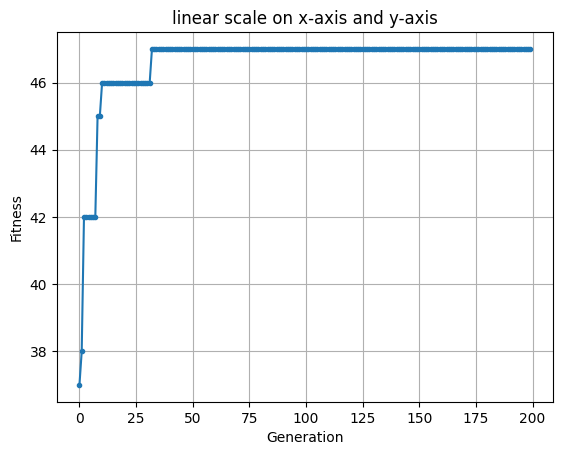

In [13]:
plt.figure()
plt.subplot(111)
plt.plot(list_of_best_outputs,marker='.')
plt.xscale('linear')
plt.yscale('linear')
plt.title('linear scale on x-axis and y-axis')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.grid(True)


Extracting the best chromosome (parameter vector) after completing all generations

In [14]:
# Getting the best solution after iterating finishing all generations.
#At first, the fitness is calculated for each solution in the final generation.

if current_ANN_structure=='2-2-1':
    np_column_array_of_fitness_values=ga_fitness_ANN_2_2_1(population_np_2D_array_with_individuals_per_row)
else:
    np_column_array_of_fitness_values=ga_fitness_ANN_2_10_5_1(population_np_2D_array_with_individuals_per_row)

# Then return the row of that solution corresponding to the best fitness.
np_2D_array_with_max_arg_row_and_col=np.argwhere(np_column_array_of_fitness_values==np.max(np_column_array_of_fitness_values))[0]
max_fitness_row=np_2D_array_with_max_arg_row_and_col[0]

best_np_1D_row_array_with_parameters_of_ANN=population_np_2D_array_with_individuals_per_row[max_fitness_row, :]
print("Best solution fitness : ", np_column_array_of_fitness_values[max_fitness_row])
print("Best solution : ", best_np_1D_row_array_with_parameters_of_ANN)

print('Number of function evaluations=',no_of_generations*population_size)

Best solution fitness :  [47.]
Best solution :  [ 1.42598406e+01  2.44433328e+01  1.52442921e+01 -7.90401249e+00
  1.43242865e+01 -2.04548528e+01 -5.29373404e+00  5.05429613e+00
 -9.04863568e-02 -9.54374027e+00  5.65598096e+00  1.31736377e+00
 -1.13275605e+00  1.31265674e+00  2.16794019e+00  1.51807420e+01
 -7.99535236e+00 -1.65987177e+01 -1.04521500e+00  1.60132634e+00
 -1.85707347e+01  5.88833689e-03 -3.75907038e+00  9.78249419e+00
 -8.76797826e+00 -1.41956983e+01  3.03510695e+00  5.48655522e+00
 -1.00875008e+01  2.26458357e+01  1.07721028e+01 -9.90445915e+00
 -1.51631883e+01 -6.94607780e+00  1.58497669e+01 -9.81170693e+00
  3.17310454e+00 -8.62310990e+00  2.68592788e+00 -6.28495711e+00
  1.20559480e+01 -4.03358925e+00 -1.53432609e+01  1.32263476e+00
  6.55306293e+00 -4.13373830e-01  8.79837928e+00 -5.04942541e+00
 -9.56622555e+00  6.90868418e-02  2.09607596e+01  1.93215410e+01
  4.73007266e+00 -1.30837592e+01  5.20704445e+00 -2.02512858e+01
  1.92946476e+01  1.69459397e+01  1.898617

Make predictions (blue) using the best network found and compare with the desired outputs (orange)

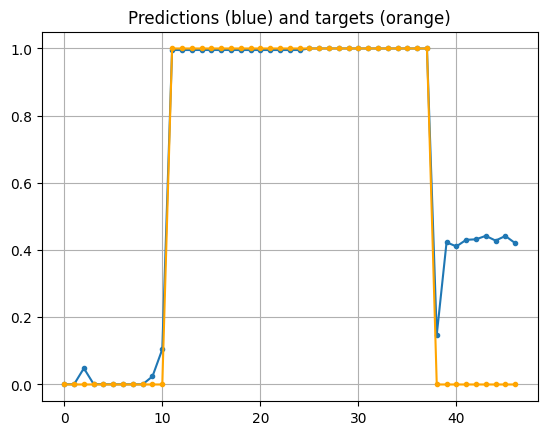

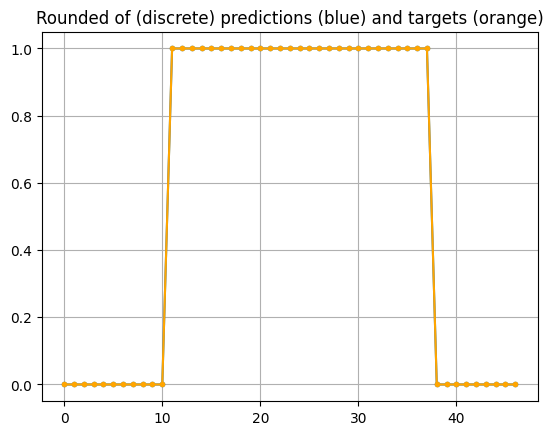

In [15]:
if current_ANN_structure=='2-2-1':
    y_pred_as_np_2D_colum=ann_2_2_1_prediction(X_np_2D_array_examples_as_rows_GLOBAL, best_np_1D_row_array_with_parameters_of_ANN.flatten())
else:
    y_pred_as_np_2D_colum=ann_2_10_5_1_prediction(X_np_2D_array_examples_as_rows_GLOBAL, best_np_1D_row_array_with_parameters_of_ANN.flatten())


plt.figure()
plt.subplot(111)
plt.plot(y_pred_as_np_2D_colum,marker='.')
plt.plot(targets_y_np_2D_column_array_GLOBAL,marker='.',color='orange')
plt.title('Predictions (blue) and targets (orange)')
plt.grid()

plt.figure()
plt.subplot(111)
plt.plot(np.rint(y_pred_as_np_2D_colum),marker='.')
plt.plot(targets_y_np_2D_column_array_GLOBAL,marker='.',color='orange')
plt.title('Rounded of (discrete) predictions (blue) and targets (orange)')
plt.grid()

Evaluate the best trained network across a grid to produce heatmap and 3D surface

In [16]:
#DETERMINE THE NETWORK RESPONSE Y_pred ACROSS THE INPUT SPACE OF INTEREST
x1_values=np.linspace(-0.5,1.5,150)
x2_values=np.linspace(-0.5,1.5,150)
Y_pred=np.empty((x1_values.size,x2_values.size))


if current_ANN_structure=='2-2-1':
    for i in range(x1_values.size):
        for j in range(x2_values.size):
            tmp_array=np.asarray([x1_values[i],x2_values[j]])
            X_as_np_2D_array_examples_as_rows=tmp_array.reshape(1,-1)
            y_pred_as_np_2D_colum=ann_2_2_1_prediction(X_as_np_2D_array_examples_as_rows, best_np_1D_row_array_with_parameters_of_ANN.flatten())
            Y_pred[i,j]=y_pred_as_np_2D_colum[0]
else:
    for i in range(x1_values.size):
        for j in range(x2_values.size):
            tmp_array=np.asarray([x1_values[i],x2_values[j]])
            X_as_np_2D_array_examples_as_rows=tmp_array.reshape(1,-1)
            y_pred_as_np_2D_colum=ann_2_10_5_1_prediction(X_as_np_2D_array_examples_as_rows, best_np_1D_row_array_with_parameters_of_ANN.flatten())
            Y_pred[i,j]=y_pred_as_np_2D_colum[0]



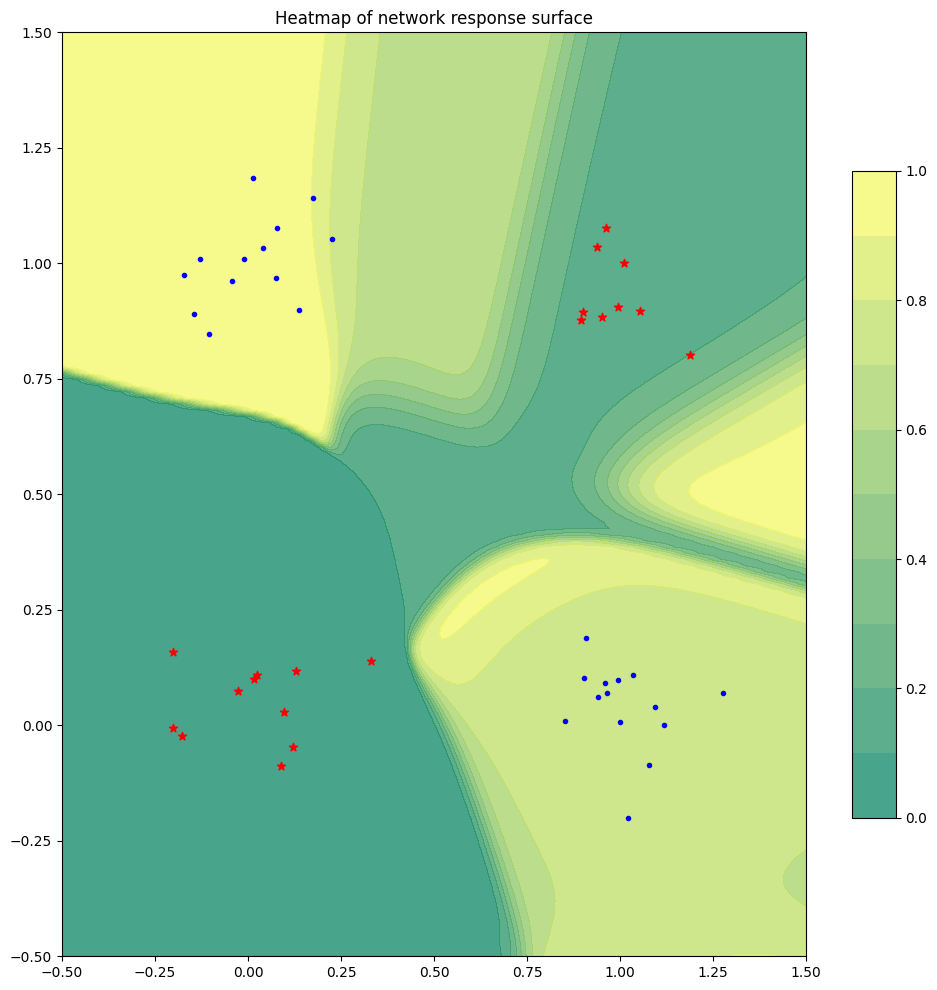

In [ ]:
#CREATE "HEATMAP" SHOWING THE NETWORK RESPONSES

fig, ax = plt.subplots(figsize=(12, 12))

no_of_contour_levels=10

X1, X2 = np.meshgrid(x1_values, x2_values)

c=plt.contourf(X2,X1,Y_pred,no_of_contour_levels, alpha=.75, cmap="summer")
plt.colorbar(shrink=0.7, aspect=15)

np.x1=X_np_2D_array_examples_as_rows_GLOBAL[:,0]
np.x2=X_np_2D_array_examples_as_rows_GLOBAL[:,1]
logical_blue=np.logical_not(targets_y_np_2D_column_array_GLOBAL==0)
logical_red=(targets_y_np_2D_column_array_GLOBAL==0)
logical_blue_1d=logical_blue.flatten()
logical_red_1d=logical_red.flatten()



logical_blue=np.logical_not(targets_y_np_2D_column_array_GLOBAL==0)
logical_red=(targets_y_np_2D_column_array_GLOBAL==0)
ax.scatter(np.x1[logical_blue_1d],np.x2[logical_blue_1d],marker='.',color='b')
ax.scatter(np.x1[logical_red_1d],np.x2[logical_red_1d],marker='*',color='r')

plt.title('Heatmap of network response surface')
plt.show();

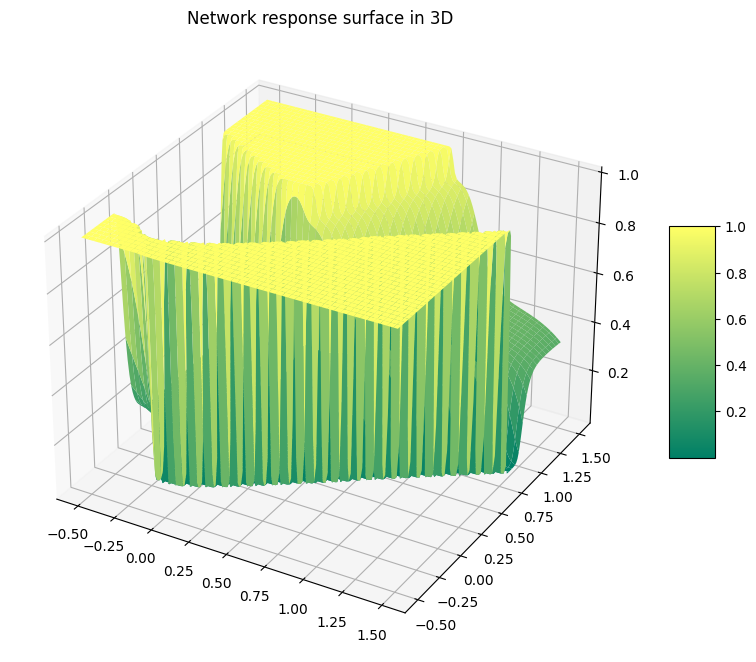

In [17]:
fig=plt.figure(figsize=[10,10])
ax = fig.add_subplot(111, projection='3d')
X1, X2 = np.meshgrid(x1_values, x2_values)
surf =ax.plot_surface(X2, X1, Y_pred,cmap="summer")
fig.colorbar(surf, shrink=0.3, aspect=5);
plt.title('Network response surface in 3D');

# Now what?: Continue by answering the problems the assignment document!